## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df_clean = application_df.drop(columns = ['EIN'], axis=1)
application_df_clean

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [4]:
# Determine the number of unique values in each column.
application_df_clean.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df_clean['APPLICATION_TYPE'].value_counts()
application_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace
application_types_to_replace = list(application_count[application_count<400].index)
application_types_to_replace


# # Replace in dataframe
for app in application_types_to_replace:
    application_df_clean['APPLICATION_TYPE'] = application_df_clean['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df_clean['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df_clean['CLASSIFICATION'].value_counts()
classification_count

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count_h1 =classification_count[classification_count>1]
classification_count_h1

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_count[classification_count<1000].index)
classifications_to_replace

# Replace in dataframe
for cls in classifications_to_replace:
    application_df_clean['CLASSIFICATION'] = application_df_clean['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df_clean['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [12]:
# Split the Range column into two columns
application_df_clean[['min_val_income', 'max_val_income']] = application_df_clean['INCOME_AMT'].str.split('-', expand=True)

# Define a function to convert the values to integers
def convert_to_numeric(value):
    if value is None:
        return 0  # Handle None values
    elif '+' in value:
        value = value.replace('+', '')  # Remove the '+' symbol
    if 'M' in value:
        return int(float(value.replace('M', '')) * 1000000)
    elif 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    elif value.isdigit():
        return int(value)
    else:
        return 0

# Convert the values in the min_val and max_val columns to integers
application_df_clean['min_val_income'] = application_df_clean['min_val_income'].apply(convert_to_numeric)
application_df_clean['max_val_income'] = application_df_clean['max_val_income'].apply(convert_to_numeric)

# Drop the original column 
application_df_clean.drop(columns=['INCOME_AMT'], inplace=True)


application_df_clean['mean_income'] = application_df_clean[['min_val_income', 'max_val_income']].mean(axis=1)
application_df_clean

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,min_val_income,max_val_income,mean_income
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,N,5000,1,0,0,0.0
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,N,108590,1,1,9999,5000.0
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,N,5000,0,0,0,0.0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,N,6692,1,10000,24999,17499.5
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,N,142590,1,100000,499999,299999.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,N,5000,0,0,0,0.0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,N,5000,0,0,0,0.0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,N,5000,0,0,0,0.0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,N,5000,1,0,0,0.0


In [14]:
# Dropping more columns
application_df_clean2 = application_df_clean
application_df_clean2 = application_df_clean2.drop(['min_val_income', 'max_val_income','STATUS','SPECIAL_CONSIDERATIONS'], axis=1)
application_df_clean2

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,ASK_AMT,IS_SUCCESSFUL,mean_income
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,5000,1,0.0
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,108590,1,5000.0
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,5000,0,0.0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,6692,1,17499.5
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,142590,1,299999.5
...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,5000,0,0.0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,5000,0,0.0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,5000,0,0.0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,5000,1,0.0


In [16]:
name_count = application_df_clean2['NAME'].value_counts()

# Choose a cutoff value and create a list of name to be replaced
# use the variable name `classifications_to_replace`
name_to_replace = list(name_count[name_count<5].index)
name_to_replace
# Replace in dataframe
for cls in name_to_replace:
    application_df_clean2['NAME'] = application_df_clean2['NAME'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df_clean2['NAME'].value_counts()

NAME
Other                                                                19803
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
                                                                     ...  
GUILDS OF THE SANTA FE OPERA INC                                         5
FAMILY MOTOR COACH ASSOCIATION                                           5
JAMESTOWN SOCIETY                                                        5
MOST WORSHIPFUL PRINCE HALL GRAND LODGE OF FREE & ACCEPTED MASONS        5
PTA HAWAII CONGRESS                                                      5
Name: count, Length: 403, dtype: int64

In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_model = pd.get_dummies(application_df_clean)
application_df_model

,STATUS,ASK_AMT,IS_SUCCESSFUL,min_val_income,max_val_income,mean_income,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0.0,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
1,1,108590,1,1,9999,5000.0,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
2,1,5000,0,0,0,0.0,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
3,1,6692,1,10000,24999,17499.5,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
4,1,142590,1,100000,499999,299999.5,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0.0,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
34295,1,5000,0,0,0,0.0,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
34296,1,5000,0,0,0,0.0,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
34297,1,5000,1,0,0,0.0,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False


In [18]:
# Split our preprocessed data into our features and target arrays
X = application_df_model.drop('IS_SUCCESSFUL',axis =1)
y =application_df_model['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state =42)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled.shape

(25724, 440)

## Optimization of the Model

In [20]:
num_features = X_train_scaled.shape[1]

# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid','linear'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=50,
        max_value=100,
        step=5), activation=activation, input_dim=num_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model


In [21]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=10,
    hyperband_iterations=2)

c:\Users\nigro\anaconda3\envs\mnpy39\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs = 10,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 01m 01s]
val_accuracy: 0.7904373407363892

Best val_accuracy So Far: 0.7953352928161621
Total elapsed time: 00h 12m 26s


In [23]:
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'activation': 'tanh', 'first_units': 60, 'num_layers': 3, 'units_0': 11, 'units_1': 11, 'units_2': 21, 'units_3': 16, 'units_4': 26, 'tuner/epochs': 4, 'tuner/initial_epoch': 2, 'tuner/bracket': 2, 'tuner/round': 1, 'tuner/trial_id': '0037'}
{'activation': 'relu', 'first_units': 75, 'num_layers': 1, 'units_0': 26, 'units_1': 26, 'units_2': 1, 'units_3': 1, 'units_4': 1, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0019'}
{'activation': 'sigmoid', 'first_units': 70, 'num_layers': 2, 'units_0': 6, 'units_1': 26, 'units_2': 11, 'units_3': 26, 'units_4': 6, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0043'}


In [24]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.7953 - loss: 0.4427
Loss: 0.44271931052207947, Accuracy: 0.7953352928161621
268/268 - 0s - 2ms/step - accuracy: 0.7943 - loss: 0.4510
Loss: 0.4510161280632019, Accuracy: 0.7942857146263123
268/268 - 0s - 2ms/step - accuracy: 0.7934 - loss: 0.4411
Loss: 0.4410785734653473, Accuracy: 0.7933527827262878


In [25]:
top_model = tuner.get_best_models(1)[0]


In [27]:
# Get the list of layers in the model
layers = top_model.layers

# Iterate over each layer and print its activation function
for layer in layers:
    if hasattr(layer, 'units'):
        print("Number of Units:", layer.units)
    print("Layer Name:", layer.name)
    print("Activation Function:", layer.activation.__name__)

Number of Units: 60
Layer Name: dense
Activation Function: tanh
Number of Units: 11
Layer Name: dense_1
Activation Function: tanh
Number of Units: 11
Layer Name: dense_2
Activation Function: tanh
Number of Units: 21
Layer Name: dense_3
Activation Function: tanh
Number of Units: 1
Layer Name: dense_4
Activation Function: sigmoid


In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = X_train_scaled.shape[1]

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units =60, activation='tanh', input_dim = num_features))

#  hidden layer
nn.add(tf.keras.layers.Dense(units =11, activation='tanh'))
nn.add(tf.keras.layers.Dense(units =11, activation='tanh'))
nn.add(tf.keras.layers.Dense(units = 21, activation='tanh'))


# Output layer
nn.add(tf.keras.layers.Dense(units =1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 60)             │        26,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           671 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 21)             │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,537 (107.57 KB)

 Trainable params: 27,537 (107.57 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
nn.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7551 - loss: 0.5095
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7959 - loss: 0.4294
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7947 - loss: 0.4271
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7913 - loss: 0.4294
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8001 - loss: 0.4211
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7979 - loss: 0.4213
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8036 - loss: 0.4161
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8015 - loss: 0.4176
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8005 - loss: 0.4167
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8008 - loss: 0.4175
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8004 - loss: 0.4184
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━━━━━━

In [31]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 1ms/step - accuracy: 0.7890 - loss: 0.4513
Loss: 0.45133301615715027, Accuracy: 0.7890378832817078


<Axes: >

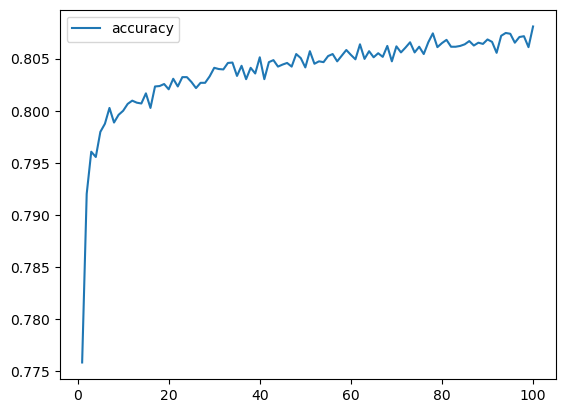

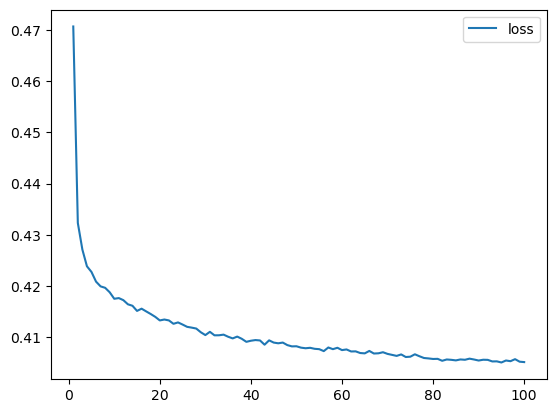

In [32]:
# plotting the accuracy and loss
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')
history_df.plot(y = 'loss')

In [33]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization4.h5')